In [1]:
using DataFrames

In [2]:
type NNparams
    a::Array{Float64}
end 
toyparams = NNparams([rand(),rand(),rand()])

NNparams([0.196898, 0.375592, 0.0537909])

In [3]:
function σ(z::Float64)
    return 1.0 / (1.0 + exp(-z))
end
σ(.5)

0.6224593312018546

In [4]:
function updateNNparams(gradient::Array{Float64,1}, 
                        params::NNparams, learning_rate::Float64)
   params.a = params.a - gradient*learning_rate
    return params
end
#test
toyparams = NNparams([rand(),rand(),rand()])
grad = ∇(x,y,toyparams)
updateNNparams(grad,toyparams,.5)

LoadError: [91mUndefVarError: ∇ not defined[39m

In [5]:
function printNNparam(param::NNparams)
    @printf("PrintNN ==> %f %f %f\n", param.a[1], param.a[2], param.a[3])
    return
end

printNNparam (generic function with 1 method)

In [6]:
function output(params::NNparams, x::Array{Float64,1})
    #nb_data = size(x[1,:])
    #for i = 1:nb_data
    #x = x[i, :]
    return σ(dot(params.a,x))
    #end
end 

output (generic function with 1 method)

In [7]:
function loss(params::NNparams, yi::Array{Float64,1}, 
                x::Array{Float64,2})
    nb_data = size(x)[1]
     y_pred = zeros(length(yi))
    @assert(size(x)[1]== length(yi))
   for i = 1:nb_data
        y_pred[i]= output(params,x[i,:])
    end
    return sum(yi.*log.(1e-7+y_pred) .+ (1-yi).*log.(1e-7+1-y_pred))
end

loss (generic function with 1 method)

In [8]:
#gradient 
function ∇(x::Array{Float64,2},y::Array{Float64,1}, params::NNparams)
    grad = [0.0 for i=1:size(x)[2]]
    nb_data = size(x)[1]
    for i = 1:nb_data
        xi = x[i, :]
        yi = y[i]
        y_pred = output(params, xi)
        grad = grad .+ xi.*(yi - y_pred)
    end
    grad = grad/ nb_data
    return grad::Array{Float64,1}
end

∇ (generic function with 1 method)

In [9]:
function convertdata_to_array(dtf::DataFrame)
    nb_data = size(dtf)[1]
        x = zeros(Float64, nb_data, 3)
        
        x[:,1] = dtf[:x1]
        x[:,2] = dtf[:x2]
        x[:,3] = ones(Float64,size(x)[1])
        
        y = convert(Array, dtf[:y]) * 1.0
        #x = convert(Array, df[:x1], df[:x2], ones(Float64, size(x)[1]))
        return x,y
    end

convertdata_to_array (generic function with 1 method)

In [10]:
function init_params(x::Array{Float64,2})
    return [rand() for i = 1:size(x[1, :])[1]]
    end 
test = init_params(rand(4,4))
x= rand(5,5)
test

4-element Array{Float64,1}:
 0.35569  
 0.328564 
 0.0562307
 0.473233 

In [11]:
function select_trainingdata(x::Array{Float64,2}, y::Array{Float64,1}, batch_size::Int)
    nb_data = length(y)
    
    ids = [i for i = 1:nb_data]
    sampled_ids = sample(ids, batch_size)
    
    x_training = x[sampled_ids, :]
    y_training = y[sampled_ids]
    
    return x_training, y_training
end


select_trainingdata (generic function with 1 method)

In [12]:
x,y = convertdata_to_array(dtf)
testparams = init_params(x)

LoadError: [91mUndefVarError: dtf not defined[39m

In [13]:
function update_learning_rate(init_learning_rate::Float64, nb_steps::Int)
    return init_learning_rate* ((1.0)/ (1.0 + (.05*nb_steps)))
end

update_learning_rate (generic function with 1 method)

In [22]:
dtf = readtable("data.csv")
x,y = convertdata_to_array(dtf)
nb_steps = 1000

params = NNparams(init_params(x))
param_history_a1 = Float64[]
param_history_a2 = Float64[]
param_history_a3 = Float64[]
loss_history = Float64[]
output_history = Float64[]
grad_history = Float64[]
learning_rate_history = Float64[]

for s = 1:nb_steps  
    x_training,y_training = select_trainingdata(x,y,1000)
    grad = ∇(x_training, y_training, params)
    learning_rate = update_learning_rate(.07,s)
    params = updateNNparams(grad,params,learning_rate)
    result = output(params, x_training[s,:])
    loss_at_this_step = loss(params,y,x)
    @printf("Step %d / %d, loss = %f\n", s, nb_steps, loss_at_this_step)
    @printf("a_1 = %f, a_2 = %f, b = %f\n", params.a[1],params.a[2],
        params.a[3])
    @printf("\tgrad = %f\n", norm(grad))
    @printf("rate = %f\n",learning_rate)

    #push!(param_history,params)
    push!(param_history_a1, params.a[1])
    push!(param_history_a2, params.a[2])
    push!(param_history_a3, params.a[3])
    
    push!(loss_history, loss_at_this_step)
    
    #if s == 10
        #for i = 1:s
        #printNNparam(param_history[i])
        #end
    #end
    #for i = 1:length(x_training[:,1])
       push!(output_history,result)
    #end
end
print

Step 1 / 1000, loss = -1471.550288
a_1 = 0.513667, a_2 = 0.160741, b = 0.081894
	grad = 2.116161
rate = 0.066667
Step 2 / 1000, loss = -1850.575001
a_1 = 0.640925, a_2 = 0.240230, b = 0.109283
	grad = 2.396796
rate = 0.063636
Step 3 / 1000, loss = -2274.345499
a_1 = 0.777038, a_2 = 0.327361, b = 0.138351
	grad = 2.697660
rate = 0.060870
Step 4 / 1000, loss = -2692.776056
a_1 = 0.905515, a_2 = 0.417119, b = 0.166482
	grad = 2.729657
rate = 0.058333
Step 5 / 1000, loss = -3078.257618
a_1 = 1.024091, a_2 = 0.497297, b = 0.193068
	grad = 2.599766
rate = 0.056000
Step 6 / 1000, loss = -3447.754543
a_1 = 1.135959, a_2 = 0.576671, b = 0.218486
	grad = 2.590755
rate = 0.053846
Step 7 / 1000, loss = -3791.119279
a_1 = 1.240077, a_2 = 0.652213, b = 0.242791
	grad = 2.524723
rate = 0.051852
Step 8 / 1000, loss = -4140.178319
a_1 = 1.347360, a_2 = 0.732731, b = 0.267514
	grad = 2.727926
rate = 0.050000
Step 9 / 1000, loss = -4462.599519
a_1 = 1.452677, a_2 = 0.807598, b = 0.291872
	grad = 2.723763

Step 78 / 1000, loss = -7645.317528
a_1 = 5.121581, a_2 = 3.379740, b = 1.133678
	grad = 2.700713
rate = 0.014286
Step 79 / 1000, loss = -7649.685966
a_1 = 5.150460, a_2 = 3.401478, b = 1.140450
	grad = 2.600462
rate = 0.014141
Step 80 / 1000, loss = -7653.827918
a_1 = 5.179225, a_2 = 3.421605, b = 1.147124
	grad = 2.552591
rate = 0.014000
Step 81 / 1000, loss = -7658.105892
a_1 = 5.209465, a_2 = 3.442891, b = 1.153927
	grad = 2.712654
rate = 0.013861
Step 82 / 1000, loss = -7662.085396
a_1 = 5.238274, a_2 = 3.462821, b = 1.160433
	grad = 2.595855
rate = 0.013725
Step 83 / 1000, loss = -7666.292725
a_1 = 5.268417, a_2 = 3.485041, b = 1.167282
	grad = 2.800783
rate = 0.013592
Step 84 / 1000, loss = -7670.110844
a_1 = 5.297208, a_2 = 3.504680, b = 1.173714
	grad = 2.632703
rate = 0.013462
Step 85 / 1000, loss = -7674.077044
a_1 = 5.328017, a_2 = 3.525061, b = 1.180553
	grad = 2.817606
rate = 0.013333
Step 86 / 1000, loss = -7677.885349
a_1 = 5.357330, a_2 = 3.545670, b = 1.187117
	grad =

Step 167 / 1000, loss = -7822.934340
a_1 = 7.081387, a_2 = 4.745795, b = 1.580109
	grad = 2.639737
rate = 0.007487
Step 168 / 1000, loss = -7823.781780
a_1 = 7.097301, a_2 = 4.757776, b = 1.583877
	grad = 2.722319
rate = 0.007447
Step 169 / 1000, loss = -7824.596661
a_1 = 7.113453, a_2 = 4.768694, b = 1.587529
	grad = 2.677760
rate = 0.007407
Step 170 / 1000, loss = -7825.443348
a_1 = 7.130021, a_2 = 4.780491, b = 1.591338
	grad = 2.808258
rate = 0.007368
Step 171 / 1000, loss = -7826.210430
a_1 = 7.145160, a_2 = 4.791083, b = 1.594966
	grad = 2.568807
rate = 0.007330
Step 172 / 1000, loss = -7826.997343
a_1 = 7.160669, a_2 = 4.802429, b = 1.598494
	grad = 2.679455
rate = 0.007292
Step 173 / 1000, loss = -7827.769213
a_1 = 7.176309, a_2 = 4.813162, b = 1.602142
	grad = 2.662824
rate = 0.007254
Step 174 / 1000, loss = -7828.553794
a_1 = 7.192431, a_2 = 4.824024, b = 1.605909
	grad = 2.744036
rate = 0.007216
Step 175 / 1000, loss = -7829.245465
a_1 = 7.206444, a_2 = 4.833944, b = 1.60927

a_1 = 8.254324, a_2 = 5.573241, b = 1.849926
	grad = 2.622499
rate = 0.005072
Step 257 / 1000, loss = -7870.043652
a_1 = 8.264459, a_2 = 5.579963, b = 1.852270
	grad = 2.450503
rate = 0.005054
Step 258 / 1000, loss = -7870.364619
a_1 = 8.274916, a_2 = 5.587562, b = 1.854612
	grad = 2.608601
rate = 0.005036
Step 259 / 1000, loss = -7870.691653
a_1 = 8.286332, a_2 = 5.594611, b = 1.857066
	grad = 2.718118
rate = 0.005018
Step 260 / 1000, loss = -7871.006738
a_1 = 8.296401, a_2 = 5.602255, b = 1.859476
	grad = 2.573939
rate = 0.005000
Step 261 / 1000, loss = -7871.333477
a_1 = 8.307428, a_2 = 5.609776, b = 1.861947
	grad = 2.724538
rate = 0.004982
Step 262 / 1000, loss = -7871.640714
a_1 = 8.317391, a_2 = 5.617167, b = 1.864360
	grad = 2.545696
rate = 0.004965
Step 263 / 1000, loss = -7871.953638
a_1 = 8.328246, a_2 = 5.624217, b = 1.866759
	grad = 2.660876
rate = 0.004947
Step 264 / 1000, loss = -7872.273476
a_1 = 8.338943, a_2 = 5.631828, b = 1.869233
	grad = 2.710089
rate = 0.004930
St

a_1 = 9.378397, a_2 = 6.356997, b = 2.106530
	grad = 2.729291
rate = 0.003500
Step 381 / 1000, loss = -7898.497549
a_1 = 9.385543, a_2 = 6.361734, b = 2.108164
	grad = 2.499738
rate = 0.003491
Step 382 / 1000, loss = -7898.652231
a_1 = 9.392670, a_2 = 6.366922, b = 2.109825
	grad = 2.575898
rate = 0.003483
Step 383 / 1000, loss = -7898.812166
a_1 = 9.399875, a_2 = 6.372430, b = 2.111565
	grad = 2.658201
rate = 0.003474
Step 384 / 1000, loss = -7898.966261
a_1 = 9.407352, a_2 = 6.377370, b = 2.113191
	grad = 2.628299
rate = 0.003465
Step 385 / 1000, loss = -7899.112741
a_1 = 9.414232, a_2 = 6.382222, b = 2.114784
	grad = 2.478727
rate = 0.003457
Step 386 / 1000, loss = -7899.275809
a_1 = 9.421982, a_2 = 6.387594, b = 2.116546
	grad = 2.781926
rate = 0.003448
Step 387 / 1000, loss = -7899.442169
a_1 = 9.429896, a_2 = 6.393164, b = 2.118304
	grad = 2.859362
rate = 0.003440
Step 388 / 1000, loss = -7899.590177
a_1 = 9.437023, a_2 = 6.398008, b = 2.119910
	grad = 2.554666
rate = 0.003431
St

	grad = 2.479672
rate = 0.002863
Step 470 / 1000, loss = -7910.279969
a_1 = 9.989309, a_2 = 6.784121, b = 2.246371
	grad = 2.849440
rate = 0.002857
Step 471 / 1000, loss = -7910.388295
a_1 = 9.995089, a_2 = 6.788760, b = 2.247726
	grad = 2.642274
rate = 0.002851
Step 472 / 1000, loss = -7910.497228
a_1 = 10.001379, a_2 = 6.792930, b = 2.249134
	grad = 2.698229
rate = 0.002846
Step 473 / 1000, loss = -7910.604998
a_1 = 10.007609, a_2 = 6.797124, b = 2.250497
	grad = 2.687703
rate = 0.002840
Step 474 / 1000, loss = -7910.709057
a_1 = 10.013413, a_2 = 6.801355, b = 2.251835
	grad = 2.577805
rate = 0.002834
Step 475 / 1000, loss = -7910.820542
a_1 = 10.019719, a_2 = 6.805767, b = 2.253306
	grad = 2.770617
rate = 0.002828
Step 476 / 1000, loss = -7910.929529
a_1 = 10.026061, a_2 = 6.809995, b = 2.254711
	grad = 2.745914
rate = 0.002823
Step 477 / 1000, loss = -7911.041983
a_1 = 10.032377, a_2 = 6.814602, b = 2.256156
	grad = 2.822111
rate = 0.002817
Step 478 / 1000, loss = -7911.141391
a_1 

a_1 = 10.748292, a_2 = 7.319236, b = 2.419932
	grad = 2.809213
rate = 0.002226
Step 610 / 1000, loss = -7922.404211
a_1 = 10.752960, a_2 = 7.322626, b = 2.421029
	grad = 2.642476
rate = 0.002222
Step 611 / 1000, loss = -7922.473045
a_1 = 10.757814, a_2 = 7.326073, b = 2.422145
	grad = 2.730183
rate = 0.002219
Step 612 / 1000, loss = -7922.543583
a_1 = 10.762728, a_2 = 7.329698, b = 2.423277
	grad = 2.803547
rate = 0.002215
Step 613 / 1000, loss = -7922.609808
a_1 = 10.767578, a_2 = 7.332817, b = 2.424381
	grad = 2.654453
rate = 0.002212
Step 614 / 1000, loss = -7922.678948
a_1 = 10.772376, a_2 = 7.336337, b = 2.425534
	grad = 2.744853
rate = 0.002208
Step 615 / 1000, loss = -7922.749240
a_1 = 10.777394, a_2 = 7.339863, b = 2.426669
	grad = 2.829271
rate = 0.002205
Step 616 / 1000, loss = -7922.817817
a_1 = 10.782275, a_2 = 7.343329, b = 2.427779
	grad = 2.765637
rate = 0.002201
Step 617 / 1000, loss = -7922.889267
a_1 = 10.787598, a_2 = 7.346762, b = 2.428917
	grad = 2.928242
rate = 0.

a_1 = 11.147288, a_2 = 7.600341, b = 2.511558
	grad = 2.594484
rate = 0.001953
Step 698 / 1000, loss = -7927.744396
a_1 = 11.151335, a_2 = 7.603126, b = 2.512492
	grad = 2.564672
rate = 0.001950
Step 699 / 1000, loss = -7927.797360
a_1 = 11.155526, a_2 = 7.606027, b = 2.513453
	grad = 2.663799
rate = 0.001947
Step 700 / 1000, loss = -7927.849831
a_1 = 11.159657, a_2 = 7.608922, b = 2.514410
	grad = 2.640741
rate = 0.001944
Step 701 / 1000, loss = -7927.905894
a_1 = 11.164221, a_2 = 7.611941, b = 2.515402
	grad = 2.863898
rate = 0.001942
Step 702 / 1000, loss = -7927.960243
a_1 = 11.168458, a_2 = 7.615007, b = 2.516389
	grad = 2.744613
rate = 0.001939
Step 703 / 1000, loss = -7928.012187
a_1 = 11.172503, a_2 = 7.617990, b = 2.517311
	grad = 2.639115
rate = 0.001936
Step 704 / 1000, loss = -7928.066040
a_1 = 11.176724, a_2 = 7.621031, b = 2.518286
	grad = 2.737151
rate = 0.001934
Step 705 / 1000, loss = -7928.120729
a_1 = 11.181020, a_2 = 7.624107, b = 2.519282
	grad = 2.784491
rate = 0.

a_1 = 11.690452, a_2 = 7.982798, b = 2.636079
	grad = 2.625057
rate = 0.001632
Step 839 / 1000, loss = -7934.216797
a_1 = 11.694180, a_2 = 7.985412, b = 2.636938
	grad = 2.843015
rate = 0.001630
Step 840 / 1000, loss = -7934.257579
a_1 = 11.697779, a_2 = 7.988023, b = 2.637772
	grad = 2.779094
rate = 0.001628
Step 841 / 1000, loss = -7934.296034
a_1 = 11.701291, a_2 = 7.990415, b = 2.638541
	grad = 2.655310
rate = 0.001626
Step 842 / 1000, loss = -7934.334151
a_1 = 11.704748, a_2 = 7.992765, b = 2.639327
	grad = 2.619500
rate = 0.001624
Step 843 / 1000, loss = -7934.375172
a_1 = 11.708527, a_2 = 7.995284, b = 2.640154
	grad = 2.845335
rate = 0.001622
Step 844 / 1000, loss = -7934.414782
a_1 = 11.712023, a_2 = 7.997852, b = 2.640959
	grad = 2.722558
rate = 0.001620
Step 845 / 1000, loss = -7934.454568
a_1 = 11.715765, a_2 = 8.000202, b = 2.641778
	grad = 2.776917
rate = 0.001618
Step 846 / 1000, loss = -7934.493799
a_1 = 11.719329, a_2 = 8.002638, b = 2.642588
	grad = 2.717035
rate = 0.

a_1 = 11.986126, a_2 = 8.189818, b = 2.703766
	grad = 2.703825
rate = 0.001480
Step 927 / 1000, loss = -7937.407682
a_1 = 11.989083, a_2 = 8.191930, b = 2.704476
	grad = 2.504316
rate = 0.001478
Step 928 / 1000, loss = -7937.438790
a_1 = 11.991990, a_2 = 8.194052, b = 2.705164
	grad = 2.481251
rate = 0.001477
Step 929 / 1000, loss = -7937.472223
a_1 = 11.995062, a_2 = 8.196380, b = 2.705906
	grad = 2.660949
rate = 0.001475
Step 930 / 1000, loss = -7937.505355
a_1 = 11.998075, a_2 = 8.198724, b = 2.706640
	grad = 2.637531
rate = 0.001474
Step 931 / 1000, loss = -7937.538435
a_1 = 12.001340, a_2 = 8.200897, b = 2.707339
	grad = 2.706686
rate = 0.001472
Step 932 / 1000, loss = -7937.572770
a_1 = 12.004631, a_2 = 8.203219, b = 2.708080
	grad = 2.784460
rate = 0.001471
Step 933 / 1000, loss = -7937.607694
a_1 = 12.007890, a_2 = 8.205699, b = 2.708818
	grad = 2.832456
rate = 0.001469
Step 934 / 1000, loss = -7937.639840
a_1 = 12.010933, a_2 = 8.207877, b = 2.709531
	grad = 2.596430
rate = 0.

print (generic function with 46 methods)


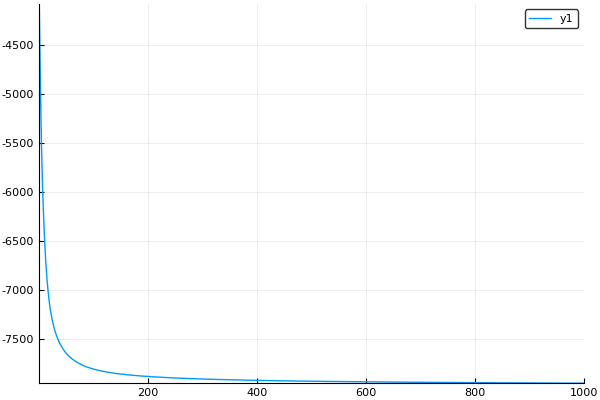

In [15]:
using Plots
x = [i for i= 1:nb_steps] ; y = loss_history
plot(x,y)



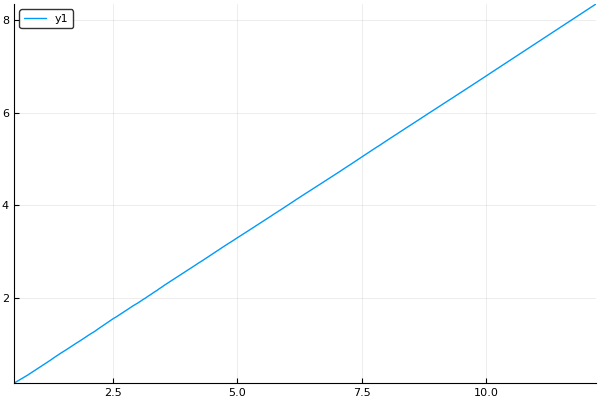

In [25]:
using Plots
    #for s = 1:nb_steps
        x = param_history_a1;
        y = param_history_a2
    #end
plot(x,y)


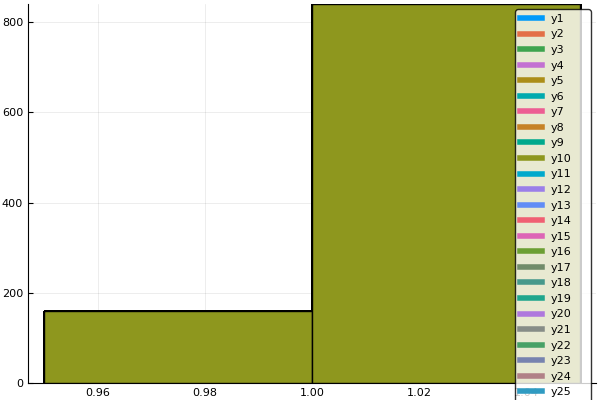

In [24]:
using Plots
histogram(1000,output_history)

In [23]:
output_history

1000-element Array{Float64,1}:
 0.956709
 0.990173
 0.999646
 0.997762
 0.999972
 0.979385
 0.999996
 0.999992
 0.967924
 0.999929
 0.999999
 1.0     
 1.0     
 ⋮       
 1.0     
 1.0     
 1.0     
 1.0     
 1.0     
 1.0     
 1.0     
 1.0     
 1.0     
 1.0     
 1.0     
 1.0     

In [19]:
typeof(loss_history[1])

Float64